# Exploratory Data Analysis of Survey Results

(Add description here)

[Factors of Academic Success Survey](https://forms.gle/vJcqWct3swRasCbAA "Link to Google Forms")


#### The two demographics that were surveyed:
- A Drum Corps Facebook Page
- People and friends who follow me on my social media accounts

#### Questions to be answered:
- What is the best way to define someone as "smart"? (likely subjective)
- Does SAT score correlate with high school or college GPA?
- Are band nerds smarter that non-band nerds?
- Which self-improvement methods are most frequent amoung smart people?
- Does drinking either energy drinks or coffee result in higher grades?
- What seperates awkward/anxious people from non-awkward/anxious people?
- Are there correlations between specific big five personality traits and Myers-Briggs types?

## Importing libraries and survey results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('ggplot')
#print(plt.style.available)
%matplotlib inline
#%matplotlib notebook

#### Read survey spreadsheets

In [2]:
surveydata = pd.read_csv("surveydata.csv")
surveydata.set_index("timestamp", inplace=True)

## 1: Introduction to the survey results

In [3]:
surveydata.info()

# not sure why "coffee" didn't become a bool value during data cleaning, but it likely won't matter anyways
# also, "depressed" and "religion" should be bool 
# both issues have to do with how nan values are stored in dataframes (I think))

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 2020-02-19 11:20:32.365 to 2020-03-05 20:08:58.881
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   survey_loc                       49 non-null     object 
 1   age                              49 non-null     int64  
 2   gender                           49 non-null     object 
 3   major                            48 non-null     object 
 4   major_cat                        49 non-null     object 
 5   school                           47 non-null     object 
 6   school_year                      46 non-null     object 
 7   hs_gpa                           49 non-null     float64
 8   college_gpa                      32 non-null     float64
 9   sat                              39 non-null     float64
 10  converted_sat                    43 non-null     float64
 11  act                              15 non-null    

#### Schema for select non-obvious columns:
| Column Name   | Type | Short Description |
|: -------------|:---|:-------------| 
|`converted_sat`|int64|Found by converting the ACT score to a SAT score, then finding the highest between the two scores|
|`music_genre` |string|Respondent's favorite music genre|
|`share_posts_often` |bool|Whether the respondent posts lots of non-original content on their social media| 
|`routine`     |bool|Whether the respondent follows a morning routine|
|`show_up_early`|bool|Whether the respondent isn't usually late to classes and events|
|`planner`|bool|Whether the respondent keeps a planner for things like time management, personal development/goals, and idea/project notes|

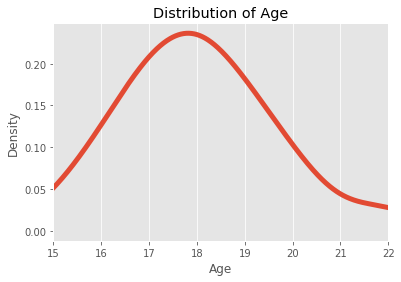

In [4]:
#fig, ax = plt.subplots()
ax = surveydata.age.plot.kde(linewidth=5)

ax.set_title("Distribution of Age")
ax.set_xlabel("Age")
ax.set_xlim(surveydata.age.min(),surveydata.age.max())
plt.grid(axis="y")
plt.savefig('Graphs/AgeDistribution.png')

plt.show()

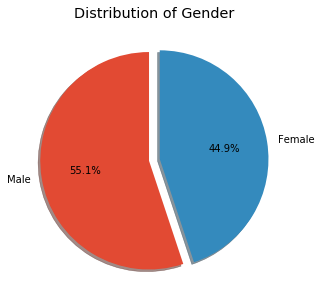

In [5]:
fig, ax = plt.subplots(figsize = (10,5))
data = surveydata.gender.value_counts()

ax.pie(data.values, explode=(0.05,0.05),
       labels=data.index, autopct='%1.1f%%',
       shadow=True, startangle=90)

ax.set_title("Distribution of Gender")
plt.savefig('Graphs/GenderDistribution.png')
plt.show()

In [6]:
surveydata[25:].head()

,survey_loc,age,gender,major,major_cat,school,school_year,hs_gpa,college_gpa,sat,converted_sat,act,iq,music_genre,fav_music_artists,fav_color,fav_comp_color,go_to_bed,avg_sleep_hours,up_from_bed,openness,conscientiousness,extraversion,agreeableness,neuroticism,myers_briggs,social_awkward,social_anxious,show_up_early,cluttered,share_posts_often,num_hobbies,religion,depressed,routine,exercise,diet,limits_social_media,planner,energy_drinks,meditation,cold_showers,coffee,drum_corps,plays_sports,nature_hobby,school_band,indoor_drumline,rick_and_morty,bojack_horseman,blade_runner_(1982),ferris_bueller's_day_off_(1986),catch-22_by_joseph_heller,stranger_things
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-20 09:18:45.734,Implying Dum corps: electric boogaloo,18,Female,Economics,Math,Dual Enrolled,Senior,4.37,3.81,1380.0,1380.0,NaN,NaN,Country,"Old dominion, lady Gaga, Taylor Swift, emblem ...",Pink,Yellow,22:00:00,10.0,08:00:00,4,4.0,4,3,1,NaN,False,False,True,True,False,NaN,NaN,NaN,False,True,True,True,False,False,False,False,NaN,True,True,True,True,True,True,False,True,True,False,False
2020-02-21 15:55:17.100,Implying Dum corps: electric boogaloo,16,Female,Biomedical engineering,Medical,High School,NaN,4.52,NaN,1280.0,1280.0,NaN,NaN,Jazz,NaN,Turquoise,Silver,23:00:00,7.5,06:30:00,5,6.0,3,5,2,INFP,True,True,True,True,False,NaN,NaN,NaN,False,True,True,False,True,False,False,False,NaN,True,False,False,True,True,False,False,True,True,False,True
2020-03-04 11:49:53.327,Other,18,Male,Data Science,Science,University,Freshman,3.50,3.75,1350.0,1350.0,NaN,NaN,Synthwave,NaN,NaN,NaN,22:00:00,8.0,06:00:00,4,8.0,1,5,4,INFJ,True,False,False,True,False,5.0,Nonreligious,False,False,True,False,True,True,False,True,True,0.0,False,False,False,False,True,False,True,True,True,True,False
2020-03-04 12:18:13.644,Dennis Farmer's Instagram,17,Female,Pharmacy,Medical,Dual Enrolled,Junior,4.00,4.00,NaN,NaN,NaN,NaN,Classic Rock,"The Beatles, Incubus, Stone Temple Pilots, The...",Blue,Purple,00:00:00,9.0,09:00:00,4,8.0,1,3,4,INTP,True,True,True,False,False,3.0,Nonreligious,False,False,False,False,False,False,False,True,False,1.0,False,False,False,True,False,True,True,False,True,False,True
2020-03-04 12:29:05.543,Dennis Farmer's Snapchat,18,Female,Animal Science,Science,University,Freshman,3.77,3.50,1380.0,1400.0,31.0,NaN,Indie/Lo-fi,"The 1975, LANY, COIN, Lauv, Tennyson",Red,White,23:00:00,10.0,09:00:00,2,9.0,3,2,4,ISFJ,False,True,True,True,False,4.0,Nonreligious,False,True,True,True,False,True,False,False,False,0.0,True,False,False,False,True,False,False,False,True,False,True


#### Initial Observations
The people who responded were all students between the ages of 15 and 22, which was to be expected considering the topic of the survey. A notable finding is that a majority of the people who bothered to click on my survey are already on the upper-end of academic success (judging from the grades columns). The next time I do a project like this, I plan to improve my methods for survey sampling to get a wider assortment of demographics. However, these results will work fine for our purposes.

As you can see, there are a total of 54 columns to sort through. To make this easier to work with, we're going to separate the columns into four seperate categories, being Academic Information, Personal Interests, Self Improvement, and Personality Questions. From there, we can analyze each individual category and use our findings to answer the questions found at the beginning of this notebook.

#### Creating categories of columns

In [7]:
surveydata.columns

Index(['survey_loc', 'age', 'gender', 'major', 'major_cat', 'school',
       'school_year', 'hs_gpa', 'college_gpa', 'sat', 'converted_sat', 'act',
       'iq', 'music_genre', 'fav_music_artists', 'fav_color', 'fav_comp_color',
       'go_to_bed', 'avg_sleep_hours', 'up_from_bed', 'openness',
       'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism',
       'myers_briggs', 'social_awkward', 'social_anxious', 'show_up_early',
       'cluttered', 'share_posts_often', 'num_hobbies', 'religion',
       'depressed', 'routine', 'exercise', 'diet', 'limits_social_media',
       'planner', 'energy_drinks', 'meditation', 'cold_showers', 'coffee',
       'drum_corps', 'plays_sports', 'nature_hobby', 'school_band',
       'indoor_drumline', 'rick_and_morty', 'bojack_horseman',
       'blade_runner_(1982)', 'ferris_bueller's_day_off_(1986)',
       'catch-22_by_joseph_heller', 'stranger_things'],
      dtype='object')

In [8]:
c = {"academics":
     ['major', 'major_cat', 'school', 'school_year', 
      'hs_gpa', 'college_gpa', 'sat', 'converted_sat', 'act', 'iq'],

    "interests":
     {
      0:['num_hobbies', 'music_genre', 'fav_music_artists', 'fav_color', 'fav_comp_color', 
      'drum_corps', 'indoor_drumline', 'plays_sports', 'nature_hobby', 'school_band'],
         
      1:['rick_and_morty', 'bojack_horseman', 'blade_runner_(1982)', 
      "ferris_bueller's_day_off_(1986)", 'catch-22_by_joseph_heller', 'stranger_things']
     },

    "improvement":
     ['go_to_bed', 'avg_sleep_hours', 'up_from_bed', 'routine', 'exercise', 'diet', 
      'limits_social_media', 'planner', 'energy_drinks', 'meditation', 'cold_showers', 'coffee'],

    "personality":
     {
      0:['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism', 'myers_briggs'],
      
      1:['social_awkward', 'social_anxious', 'show_up_early', 'cluttered', 
      'share_posts_often', 'religion', 'depressed']
     }
}

In [9]:
# Checking that I didn't miss any columns
print("Total number of columns:", surveydata.shape[1])
print("\nExcluding 'survey_loc', 'age', and 'gender'")
print("\nNumber of columns in categories dictionary:",len(c["academics"]) + len(c["interests"][0]) + len(c["interests"][1]) + len(c["improvement"]) + len(c["personality"][0]) + len(c["personality"][1]))

Total number of columns: 54

Excluding 'survey_loc', 'age', and 'gender'

Number of columns in categories dictionary: 51


## 2. Academic Information

In [10]:
#fig, ax = plt.subplots()
#ax = surveydata.college_gpa.plot.kde(linewidth=5)

#ax.plot
#plt.plot(surveydata.hs_gpa, surveydata.college_gpa, kind="kde")
#plt.title("Distribution of College Grades")
#plt.xlabel("Grade Point Average")
#ax.set_xlim(surveydata.college_gpa.min(),surveydata.college_gpa.max())
#plt.grid(axis="y")
#plt.savefig('Graphs/college.png')

#plt.show()

In [11]:
surveydata[c["academics"]].sample(n=10, random_state=2)

,major,major_cat,school,school_year,hs_gpa,college_gpa,sat,converted_sat,act,iq
timestamp,,,,,,,,,,
2020-02-20 07:36:50.548,childhood education,Fine Arts,University,Sophomore,4.20,2.00,1190.0,1190.0,NaN,NaN
2020-02-19 14:18:40.425,Biology,Science,High School,Junior,3.95,NaN,1400.0,1400.0,NaN,NaN
2020-03-04 18:55:20.028,Medicine,Medical,High School,Sophomore,3.74,NaN,NaN,NaN,NaN,NaN
2020-02-19 16:12:15.470,Kinesiology,Science,University,Senior,3.90,3.20,1500.0,1500.0,NaN,150.0
2020-03-04 14:09:54.186,Fine arts//photography,Fine Arts,High School,Junior,3.14,NaN,1010.0,1010.0,NaN,NaN
2020-03-05 14:13:34.233,Computers,Technology,Dual Enrolled,Junior,3.90,NaN,NaN,NaN,NaN,NaN
2020-03-05 14:50:04.324,Engineering,Engineering,University,Sophomore,3.40,3.50,1100.0,1100.0,NaN,NaN
2020-02-19 14:49:43.453,Computer Science,Science,High School,Senior,3.10,NaN,1110.0,1110.0,NaN,NaN
2020-02-19 15:15:43.426,Agricultural Education,Science,University,Freshman,3.69,3.60,1260.0,1340.0,29.0,NaN


As the basis for the majority of this project, the academics section of the results contains useful information about each students grades and education status. Although not many people answered the "What is your IQ?" question, we do have plenty of quantitative data to work with in the form of `hs_gpa`, `college_gpa`, and `converted_sat`.

It is common knowledge that being good at school does not necessarily mean that you are a smart individual. <strike>Because I myself am a student, I am going to pretend this fact does not exist.</strike> At the same time, it is very difficult to determine real intelligence from a three minute survey. Therefore, we will consider intelligence and level of academic success as being the same.

### Intelligence Score
To create a more concise method for determining academic success, we will formulate an "Intelligence Score" for each participant, which will take a weighted average of the `hs_gpa`, `college_gpa`, and `converted_sat` columns compared with the average value for each respective column.

If a number is missing, we will reweigh the non-missing columns to account for the missing value. `college_gpa` will be weighed more than `hs_gpa`, simply because college coursework on average is more demanding, and thus more representative of a student's academic ability. `converted_sat` will be weighed between `college_gpa` and `hs_gpa` for similar reasons.

For our purposes, we will pick arbitrary weights of `*1.0`, `*1.5`, and `*2.0` for `hs_gpa`, `converted_sat`, and `college_gpa` respectively. We can make the resulting score a number between `0` and `4` for convenience sake. 

In [12]:
print("avg hs:", surveydata.hs_gpa.mean(),
     "\navg college:", surveydata.college_gpa.mean(), 
     "\navg sat:", surveydata.converted_sat.mean(),
     "\n\nmin hs:", surveydata.hs_gpa.min(),
     "\nmin college:", surveydata.college_gpa.min(), 
     "\nmin sat:", surveydata.converted_sat.min(),
     "\n\navg sat out of 4 (/400):", surveydata.converted_sat.mean()/400)

avg hs: 3.65561224489796 
avg college: 3.4035937499999998 
avg sat: 1294.1860465116279 

min hs: 1.8 
min college: 1.3 
min sat: 930.0 

avg sat out of 4 (/400): 3.2354651162790695


In [34]:
def calc_intelligence(grades: list, hs_avg: float, college_avg: float, sat_avg: float):
    m = [pd.isnull(grades[0]), pd.isnull(grades[1]), pd.isnull(grades[2])]
    w = [1.0, 1.5, 2.0]
    
    grades[1] /= 400
    print("1: ", grades[1])
    weighted_grades = [grades[i] * w[i] for i in range(len(w))] 
    print("2: ", weighted_grades)
    intelligence_score = sum(weighted_grades) / sum(w)
    print("3: ", intelligence_score)
    return intelligence_score
    #return intelligence_score

d = [1.8, 930, 1.3]
calc_intelligence(d, surveydata.hs_gpa.mean(), surveydata.college_gpa.mean(), surveydata.converted_sat.mean())

1:  2.325
2:  [1.8, 3.4875000000000003, 2.6]
3:  1.752777777777778


1.752777777777778

## 3. Personal Interests

In [14]:
surveydata[c["interests"][0]].sample(n=10, random_state=3)

,num_hobbies,music_genre,fav_music_artists,fav_color,fav_comp_color,drum_corps,indoor_drumline,plays_sports,nature_hobby,school_band
timestamp,,,,,,,,,,
2020-02-19 14:18:40.425,NaN,alternative,"king princess, mac miller, hozier, mxmtoon, da...",green,purple,False,False,True,True,True
2020-03-04 16:22:00.966,2.0,Hip-Hop/Rap,"Kendrick Lamar, Tame Impala, The Weeknd, Future",Blue,Black,False,False,False,False,False
2020-02-19 13:56:45.531,NaN,indie,"Novo Amor, Jordan Rakei, Jacob Collier",yellow,light purple,True,False,False,False,True
2020-03-05 14:31:07.318,3.0,Indie/Lo-fi,"Josh Katz, Brendon Urie, Tyler Joseph, Josh Dunn",Indigo,Navy Blue,False,False,False,False,True
2020-03-04 12:32:48.779,1.0,Indie/Lo-fi,"Mom Jeans, Starbomb, Ninja Sex Party, McCafferty",Purple,Yellow,False,False,False,False,True
2020-03-04 12:18:13.644,3.0,Classic Rock,"The Beatles, Incubus, Stone Temple Pilots, The...",Blue,Purple,False,False,False,False,True
2020-02-19 14:49:43.453,NaN,Heavy Metal,Corey Taylor,Black,Black and Brown,True,True,False,False,True
2020-03-05 14:50:04.324,1.0,Classic Rock,"Motley Crue, AC/DC...",Blue,Red,False,False,False,False,False
2020-03-05 14:13:34.233,2.0,Classic Rock,"Alice in Chains, Soundgarden, Stone Temple Pil...",Red,Black,False,False,False,False,True


In [15]:
surveydata[c["interests"][1]].sample(n=10, random_state=4)

,rick_and_morty,bojack_horseman,blade_runner_(1982),ferris_bueller's_day_off_(1986),catch-22_by_joseph_heller,stranger_things
timestamp,,,,,,
2020-02-19 12:43:39.850,True,False,False,True,False,False
2020-03-05 14:50:04.324,False,False,False,True,False,True
2020-02-19 14:11:26.445,True,False,True,True,False,True
2020-02-19 11:36:03.104,False,False,False,True,False,True
2020-02-19 14:18:40.425,True,True,False,True,True,True
2020-03-04 12:32:48.779,True,True,True,True,False,True
2020-02-19 12:55:15.033,True,False,True,True,False,True
2020-02-20 09:18:45.734,True,False,True,True,False,False
2020-03-05 14:23:03.455,False,False,False,False,False,False


## 4. Self Improvement

In [16]:
surveydata[c["improvement"]].sample(n=10, random_state=5)

,go_to_bed,avg_sleep_hours,up_from_bed,routine,exercise,diet,limits_social_media,planner,energy_drinks,meditation,cold_showers,coffee
timestamp,,,,,,,,,,,,
2020-03-04 18:55:20.028,01:00:00,5.500000,06:30:00,False,False,True,False,True,True,True,False,0.0
2020-03-04 12:29:05.543,23:00:00,10.000000,09:00:00,True,True,True,False,True,False,False,False,0.0
2020-02-19 12:43:39.850,23:00:00,8.000000,07:00:00,True,True,True,False,True,False,False,True,NaN
2020-02-19 18:16:24.451,23:45:00,8.250000,08:00:00,False,True,True,True,False,True,False,False,NaN
2020-03-04 12:18:13.644,00:00:00,9.000000,09:00:00,False,False,False,False,False,False,True,False,1.0
2020-02-19 16:30:31.691,01:00:00,7.000000,08:00:00,False,True,False,False,False,True,False,False,NaN
2020-02-19 11:22:22.283,22:00:00,9.000000,07:00:00,True,True,False,True,True,False,False,False,NaN
2020-03-04 22:16:20.406,00:00:00,12.000000,12:00:00,False,False,False,False,False,True,False,False,1.0
2020-02-19 11:24:48.272,00:01:00,7.983333,08:00:00,False,True,True,False,True,True,False,False,NaN


## Personality Questions

In [17]:
surveydata[c["personality"][0]].sample(n=10, random_state=6)

,openness,conscientiousness,extraversion,agreeableness,neuroticism,myers_briggs
timestamp,,,,,,
2020-03-05 20:08:58.881,3,2.0,3,4,1,INTJ
2020-03-04 16:22:00.966,4,3.0,3,4,3,NaN
2020-03-04 15:32:53.199,5,1.0,5,2,1,ESTP
2020-02-20 07:36:50.548,2,3.0,3,4,3,NaN
2020-02-19 12:55:15.033,3,6.0,1,2,3,NaN
2020-02-19 11:20:32.365,4,5.0,2,3,3,NaN
2020-02-19 12:43:39.850,4,8.0,1,3,2,ISTJ
2020-03-04 13:24:02.943,3,6.0,3,4,2,ESFP
2020-02-19 15:15:43.426,2,8.0,1,3,2,INFJ


In [18]:
surveydata[c["personality"][1]].sample(n=10, random_state=7)

,social_awkward,social_anxious,show_up_early,cluttered,share_posts_often,religion,depressed
timestamp,,,,,,,
2020-02-19 14:49:43.453,True,False,False,True,False,NaN,NaN
2020-02-19 15:49:29.290,False,True,False,False,False,NaN,NaN
2020-02-19 23:19:00.222,True,False,False,True,False,NaN,NaN
2020-03-04 11:49:53.327,True,False,False,True,False,Nonreligious,False
2020-03-04 15:32:53.199,False,False,False,True,False,Nonreligious,True
2020-03-04 12:29:05.543,False,True,True,True,False,Nonreligious,False
2020-02-19 11:22:18.391,True,False,True,True,False,NaN,NaN
2020-02-19 22:43:23.160,True,True,False,True,False,NaN,NaN
2020-02-19 14:02:58.101,True,True,True,True,True,NaN,NaN
